# Klasifikasi Penyakit Jantung 

Kali ini,kita akan membuat sebuah pemodelan pemodelan machine learning untuk meng-klasifikasi Penyakit Jantung. Mengidentifikasi Penyakit Jantung tentunya akan sangat membantu para tenaga medis dalam mengambil tindakan untuk pasiennya.

Dalam Pembuatan Pemodelan Machine Learning, kita akan mengikuti alur machine learning pipeline :

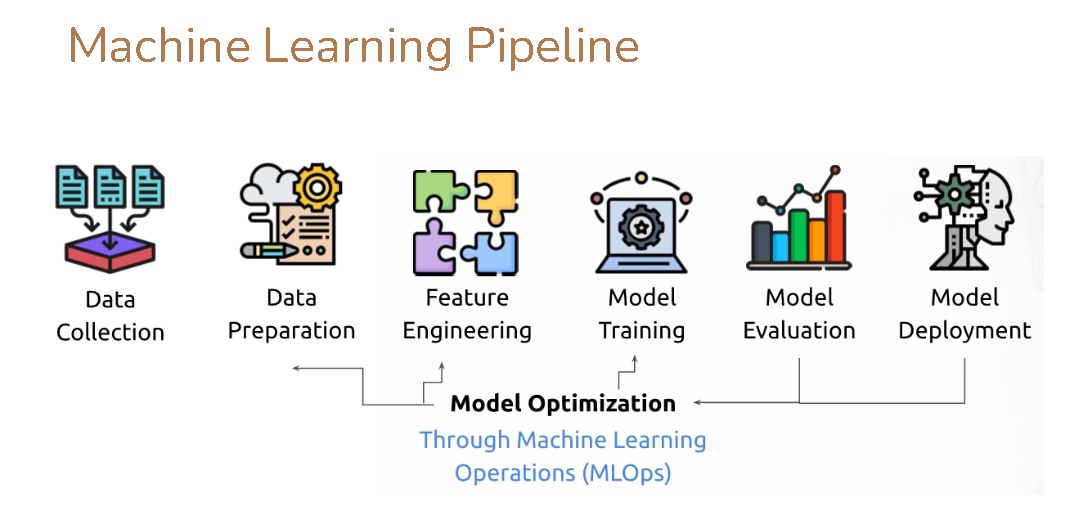


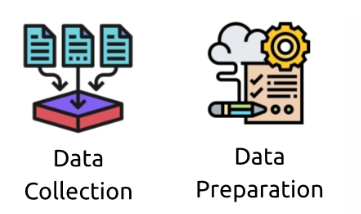
# 1. Data Collection, Data Preparation
Karena Kita Menggunakan Dataset(Heart Disease Dataset) yang sudah melewati proses Data Collection, dan Data Preparation. Jadi, Kita akan menuju ke langkah selanjutnya

**Load Dataset Menggunakan Library Pandas**

In [104]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**Buat dataframe(df) dari dataset (Heart Disease Dataset)**

In [105]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Info Atribut dalam Dataset**
Info Atribut dalam Dataset :
* **age** = Usia 
* **sex** = Jenis kelamin
* **cp** = Jenis nyeri dada (4 nilai) = Rentang 0 - 3 seberapa nyeri dada pasien 
* **trestbps** = Tekanan darah saat istirahat (Satuan dalam mmHg )
* **chol** = Kadar Kolestrol serum dalam mg/dl
* **fbs** = Gula darah puasa > 120 mg/dl ? (1 = Ya, 0 = Tidak)
* **restecg** = Hasil elektrokardiografi setelah istirahat (nilai 0,1,2)
* **thalach** = Detak jantung maksimum yang dicapai
* **exang** = Mengalami angin setelah berolahraga? (1= Ya, 0 = Tidak)
* **oldpeak** = Depresi Segmen ST yang disbebakan oleh olahraga relatif terhadap istirahat
* **slope** = Gradien/Kemiringan Segmen ST
* **ca** = Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi
* **thal** = Penyakit Menurun/Genetik Thalasemia : 1 = normal; 2 = cacat ; 3 = cacat yang dapat diperbaiki(carrier)
* **target** = 1(Ada Penyakit Jantung) / 0(Tidak Ada Penyakit Jantung)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


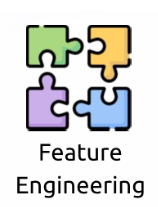
# 2. Feature Engineering
Fitur-fitur yang relevan untuk model dipilih dan diubah agar lebih informatif.

Karena Kita akan melakukan klasifikasi dan akan mengukur keakuratan klasifikasinya, kita akan memisahkan data tanpa label/data atribut (X) dan data label(Y)

In [108]:
X = df.drop(columns=['target'])
Y = df['target']

Karena nilai dalam dataset memiliki rentang nilai yang berbeda-beda,kita perlu menskalakan nilainya.

Menskalakan nilai dalam dataset yang memiliki rentang nilai yang berbeda sangat penting dalam machine learning. Berikut adalah beberapa alasan mengapa kita melakukannya:

1. **Konsistensi:** Ketika kita memiliki fitur-fitur dengan skala yang berbeda, model machine learning mungkin kesulitan memahami perbandingan antara fitur-fitur tersebut. Dengan menskalakan nilai, kita memastikan bahwa semua fitur memiliki skala yang serupa, sehingga model dapat memprosesnya dengan lebih baik.
2. **Algoritma yang Sensitif terhadap Skala:** Beberapa algoritma machine learning sangat sensitif terhadap skala fitur. Jika kita tidak menskalakan nilai, hasil model bisa menjadi bias dan tidak akurat.
3. **Optimisasi Model:** Proses optimisasi model (seperti gradient descent) lebih efisien ketika fitur-fitur memiliki skala yang serupa. Jika ada perbedaan besar dalam skala, optimisasi bisa memakan waktu lebih lama.
4. **Visualisasi:** Menskalakan nilai juga memudahkan kita dalam membuat visualisasi data. Grafik yang menggunakan skala yang serupa lebih mudah dibaca dan memahami.

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**Memisahkan dataset menjadi data training dan data testing**

Untuk menunjang kinerja pelatihan model Machine Learning, Kita perlu membagi dataset menjadi data latih/data training dan data uji/data testing

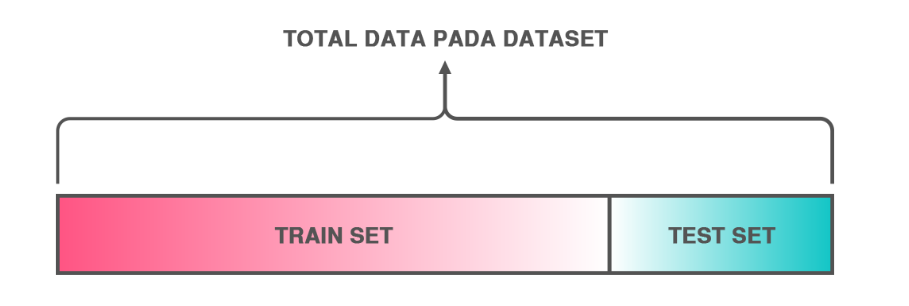

Memisahkan dataset menjadi data training dan data testing adalah praktik yang kritis dalam machine learning. Berikut adalah alasan mengapa kita melakukannya:

1. **Evaluasi Kinerja Model**: Memisahkan dataset memungkinkan kita untuk mengukur kinerja model dengan lebih baik. Data training digunakan untuk melatih model, sementara data testing digunakan untuk menguji sejauh mana model dapat memprediksi dengan benar. Jika kita tidak memisahkan data, kita tidak akan tahu seberapa baik model bekerja pada data yang belum pernah dilihat sebelumnya.

2. **Menghindari Overfitting**: Overfitting terjadi ketika model terlalu "menghafal" data training dan tidak dapat menggeneralisasi dengan baik pada data baru. Dengan memisahkan data testing, kita dapat mengidentifikasi apakah model cenderung overfit atau tidak.

3. **Mengukur Generalisasi**: Tujuan utama dari machine learning adalah menghasilkan model yang dapat digunakan pada data yang belum pernah dilihat sebelumnya. Data testing memberikan gambaran tentang sejauh mana model dapat digeneralisasi ke data baru.

4. **Tuning Hyperparameter**: Memisahkan data testing memungkinkan kita untuk melakukan tuning hyperparameter dengan lebih efisien. Kita dapat mencoba berbagai konfigurasi model pada data training dan mengukur kinerjanya pada data testing.

5. **Mengurangi Bias**: Jika kita menggunakan seluruh dataset untuk melatih dan menguji model, kita mungkin menghadapi bias yang tidak disengaja. Memisahkan data membantu mengurangi kemungkinan bias ini.


Pada Praktik ini, kita membagi data latih/training dan data uji/testing dengan rasio **80:20**


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

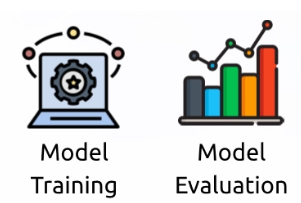

# 3. Model Training & Model Evaluation


1. **Pelatihan Model (Model Training)**:
   - Pada tahap ini, kita menggunakan data yang telah diproses (setelah tahap pengumpulan, persiapan, dan rekayasa fitur) untuk melatih model machine learning.
   - Algoritma machine learning mempelajari pola dari data dengan mencari hubungan antara fitur-fitur yang ada dan hasil yang ingin diprediksi.
   - Proses pelatihan melibatkan mengoptimalkan parameter model agar sesuai dengan data pelatihan.
   - Hasil dari tahap ini adalah model yang telah "belajar" dari data dan siap digunakan untuk memprediksi hasil pada data baru.

2. **Evaluasi Model (Model Evaluation)**:
   - Setelah model dilatih, kita perlu mengukur sejauh mana kinerjanya.
   - Beberapa metrik evaluasi yang umum digunakan meliputi:
     - **Akurasi (Accuracy)**: Persentase prediksi yang benar secara keseluruhan.
     - **Presisi (Precision)**: Kemampuan model dalam mengidentifikasi kelas positif dengan benar.
     - **Recall (Sensitivity)**: Kemampuan model dalam menemukan semua instance kelas positif.
     - **F1-Score**: Menggabungkan presisi dan recall.
     - **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**: Mengukur kemampuan model membedakan antara kelas positif dan negatif.
     - **Log Loss (Cross-Entropy Loss)**: Mengukur kesalahan prediksi probabilitas.
   - Selain itu, kita juga dapat menggunakan visualisasi seperti **kurva ROC** dan **kurva precision-recall** untuk memahami kinerja model secara lebih mendalam.


Beberapa Pemodelan yang digunakan untuk Klasifikasi Penyakit Jantung antara lain, yaitu :
1. **Support Vector Machine -> SVC**
2. **Decision Tree**
3. **Regresi Logistik**

**Model Kalisifikasi | Support Vector Classifier**

> Melatih Model SVC

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi dan latih model SVC
model_svc = SVC(kernel='rbf', C=2)
model_svc.fit(X_train, y_train)

SVC(C=2)

> Uji dan Evaluasi Model SVC

In [112]:
# Prediksi menggunakan model yang dilatih
y_pred_svc = model_svc.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Menghitung akurasi model
svc_acc_score = accuracy_score(y_test, y_pred_svc)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(svc_conf_matrix)
print("\n")

# Menampilkan akurasi model
print("Nilai Akurasi untuk model Support Vector Classifier:", svc_acc_score * 100, '%\n')

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Confusion Matrix:
[[ 88  10]
 [  3 104]]


Nilai Akurasi untuk model Support Vector Classifier: 93.65853658536587 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



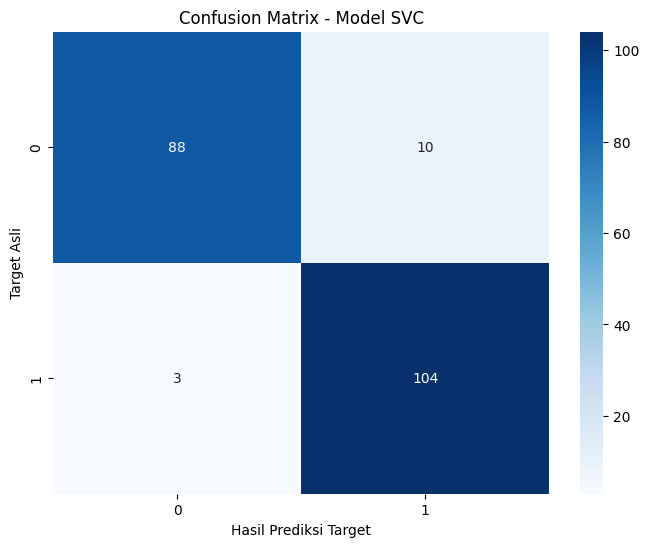

In [113]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

**Model Klasifikasi | Decision Tree**

> Melatih Model Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
# Menggunakan metode fit untuk melatih model pada data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

> Uji dan Evaluasi Model Decision Tree

In [115]:
# Melakukan prediksi pada data testing
dt_predicted = dt.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
# Menghitung akurasi model
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\n")
# Menampilkan akurasi model
print("Nilai Akurasi untuk model DecisionTreeClassifier:", dt_acc_score * 100, '%\n')
# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[95  3]
 [ 8 99]]


Nilai Akurasi untuk model DecisionTreeClassifier: 94.6341463414634 %

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



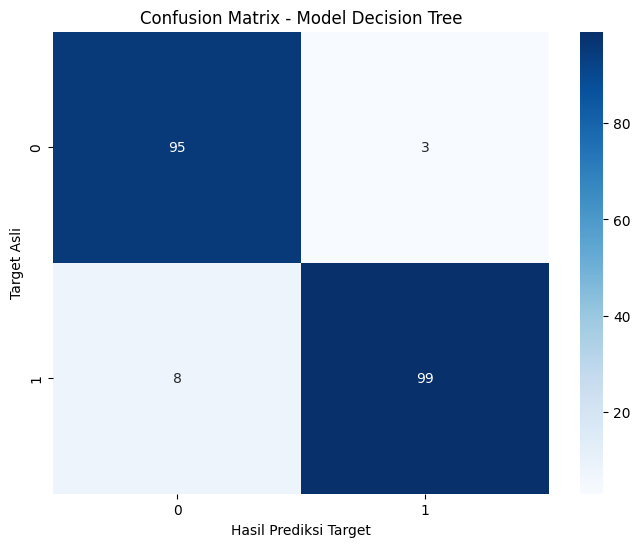

In [116]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

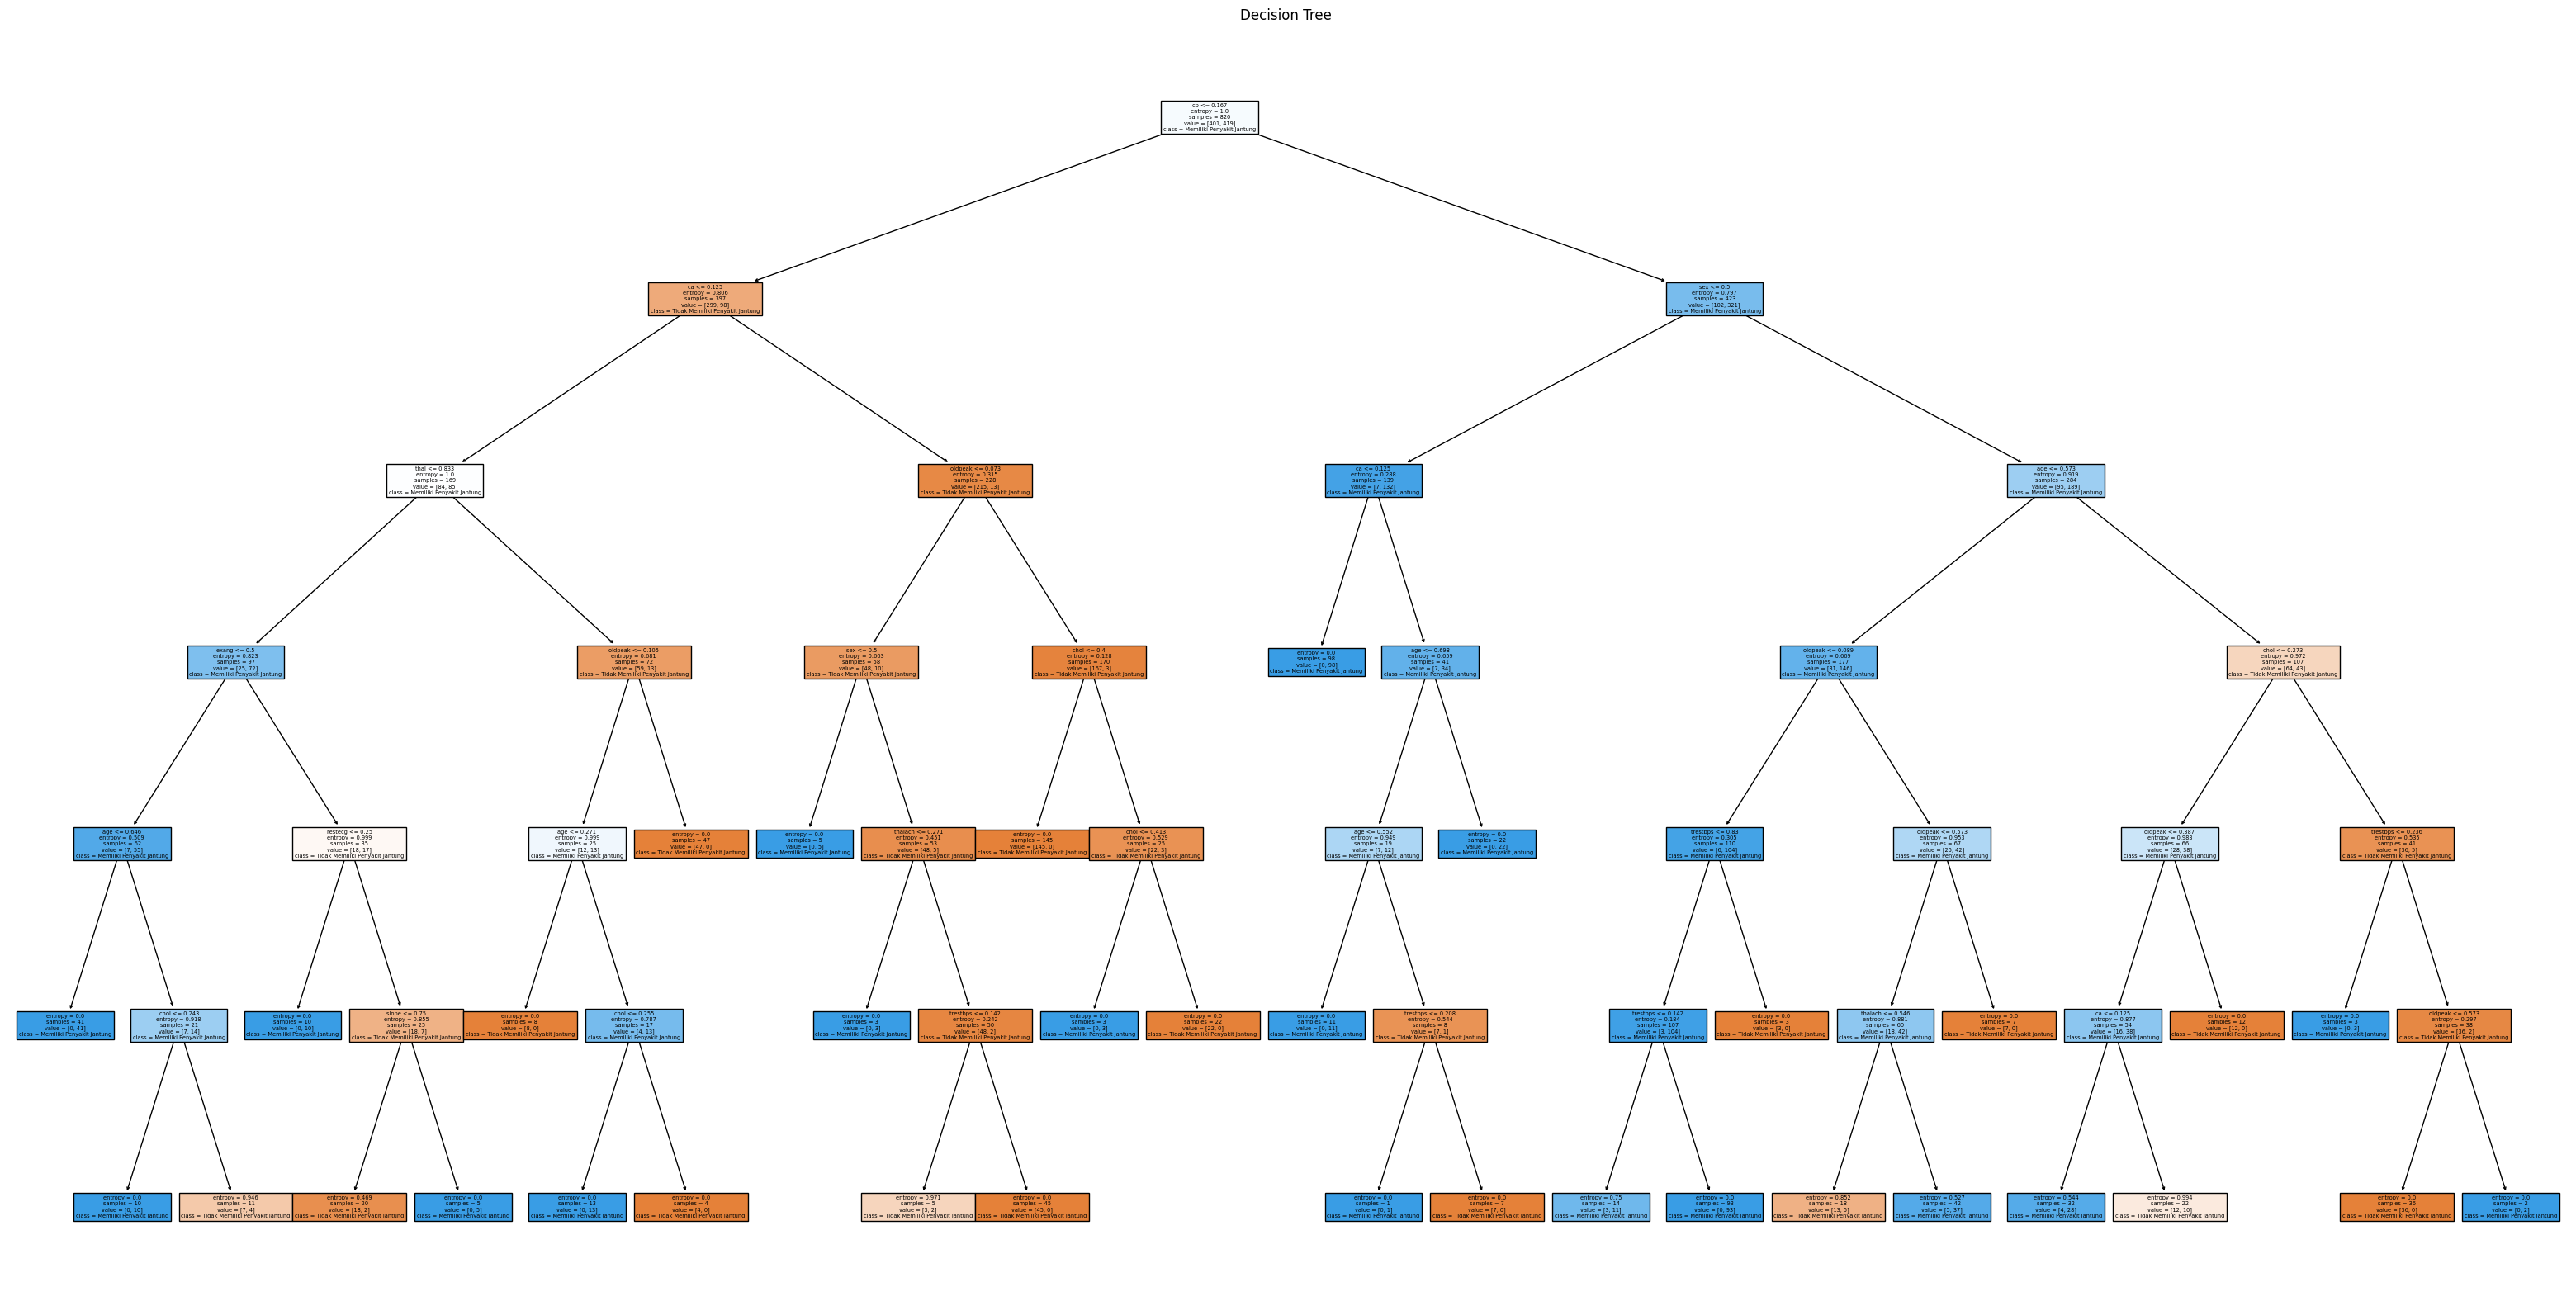

In [117]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Tidak Memiliki Penyakit Jantung', 'Memiliki Penyakit Jantung'])
plt.title('Decision Tree ')
plt.show()

**Penjelasan Visualisasi Decision Tree**

* **Akar Pohon**: Pertanyaan pada akar pohon adalah "cp <= 0.167". Ini berarti pohon membagi data berdasarkan seberapa nyeri dada pasien pasien. *-----> cp asli dari dataset berada di angka 0-3. Jadi,tiap node,valuenya sudah dalam bentuk skala*
* **Cabang**: Cabang-cabang dari akar pohon menunjukkan berbagai kemungkinan jawaban atas pertanyaan di akar pohon, seperti True (kiri) / False(Kanan)
* **Node**: Node internal pada pohon mewakili pertanyaan atau karakteristik lain yang digunakan untuk membagi data lebih lanjut.
* **Daun**: Daun pada pohon menunjukkan klasifikasi akhir pasien, yaitu "Memiliki Penyakit Jantung" atau "Tidak Memiliki Penyakit Jantung".

**Model Klasifikasi | Regresi Logistik**

> Melatih Model Regresi Logistik

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi dan latih model regresi logistik
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

> Uji dan Evaluasi Model Regresi Logistik

In [119]:
# Prediksi menggunakan model yang dilatih
lr_predicted = lr_model.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)

# Menghitung akurasi model
lr_acc_score = accuracy_score(y_test, lr_predicted)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\n")

# Menampilkan akurasi model
print("Nilai Akurasi untuk model Logistic Regression:", lr_acc_score * 100, '%\n')

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, lr_predicted))

Confusion Matrix:
[[77 21]
 [ 8 99]]


Nilai Akurasi untuk model Logistic Regression: 85.85365853658537 %

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



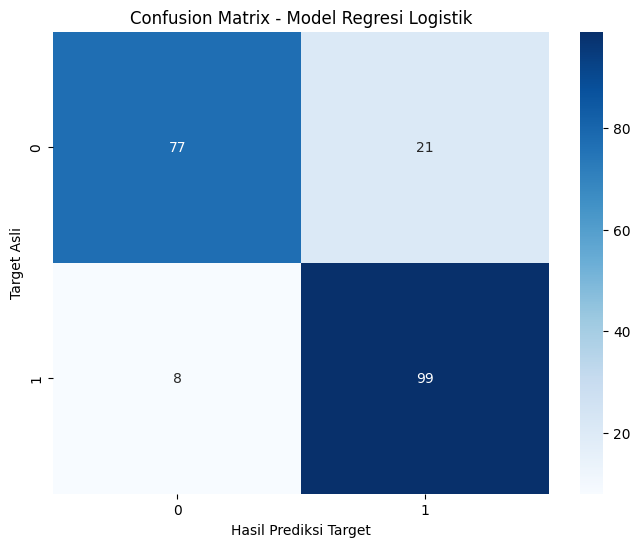

In [120]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Regresi Logistik")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

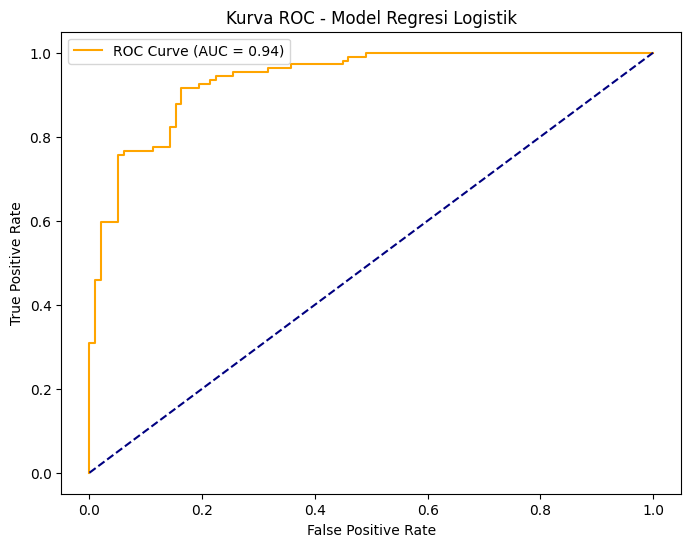

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

# Prediksi probabilitas untuk kelas 1
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Mendapatkan nilai fpr, tpr, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Menghitung Area Under ROC Curve (AUC)
auc = roc_auc_score(y_test, lr_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Model Regresi Logistik')
plt.legend()
plt.show()

**Penjelasan Kurva ROC dari Model Regresi Logistik**

Kurva ROC pada gambar menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai nilai threshold klasifikasi. Kurva ini membantu dalam mengevaluasi kinerja model klasifikasi dalam membedakan antara pasien dengan penyakit jantung (kelas positif) dan pasien tanpa penyakit jantung (kelas negatif).

**Bagian-bagian Kurva ROC:**

* **Sumbu X:** False Positive Rate (FPR)
* **Sumbu Y:** True Positive Rate (TPR)
* **Garis Diagonal:** Garis diagonal menunjukkan performa model klasifikasi acak.
* **Area di Bawah Kurva (AUC):** AUC merupakan ukuran keseluruhan kinerja model klasifikasi. Semakin tinggi nilai AUC, semakin baik kinerja model.

**Interpretasi Kurva ROC:**

* **Kurva yang terletak di atas garis diagonal:** Menunjukkan bahwa model klasifikasi lebih baik daripada model acak.
* **Kurva yang semakin dekat ke sudut kiri atas:** Menunjukkan bahwa model klasifikasi memiliki kinerja yang semakin baik.
* **Nilai AUC:** Nilai AUC 1 menunjukkan bahwa model klasifikasi sempurna, sedangkan nilai AUC 0.5 menunjukkan bahwa model klasifikasi tidak lebih baik daripada model acak.



**Kurva ROC - Model Regresi Logistik**
* **Nilai AUC:** 0.94
* **Tingkat Akurasi:** 86%


# Nilai Akurasi Model

Model Machine Learning yang telah dibuat memiliki nilai akurasi yang baik :
1. **SVC** Memiliki Nilai Akurasi sebesar = **93.65853658536587 %**
2. **Decision Tree** Memiliki Nilai Akurasi sebesar = **94.6341463414634 %**
3. **Regresi Logistik** Memiliki Nilai Akurasi sebesar = **85.85365853658537 %**

# Menguji Model dengan data baru

Sekarang kita akan menguji model dengan data asing, yang tidak ada dalam dataset,baik itu data latih maupun data uji. Dibawah ini terdapat beberapa soal untuk menguji model klasifikasi :

**Soal 1 | Klasifikasi Penyakit Jantung**

Seorang pasien berusia 40 tahun, laki-laki, dengan nyeri dada tipe 2 (nyeri seperti diremas) selama 30 menit terakhir. Nyeri dada ini menjalar ke bahu kiri dan rahang bawah. Pasien memiliki riwayat hipertensi dan diabetes melitus. Hasil pemeriksaan menunjukkan:

* Tekanan darah saat istirahat: 150/90 mmHg
* Kadar kolesterol serum: 220 mg/dL
* Gula darah puasa: 135 mg/dL
* Hasil EKG setelah istirahat: Abnormal
* Detak jantung maksimum: 170 bpm
* Mengalami angina setelah berolahraga: Ya
* Depresi Segmen ST: 2.0 mm
* Kemiringan Segmen ST: Menurun (0)
* Jumlah pembuluh darah utama yang diwarnai: 2
* Penyakit Menurun/Genetik Thalasemia: Normal (1)

Apakah pasien ini memiliki penyakit jantung?

In [122]:
# Prediksi data baru
data_baru = [[40,1,2,150,220,135,0,170,1,2.0,0,2,1]] #13 atribut databaru/tanpa label
data_baru_scaled = scaler.transform(data_baru)  # Melakukan scaling pada data baru


prediksi_data_baru_svc = model_svc.predict(data_baru_scaled)  # Melakukan prediksi
prediksi_data_baru_dt = dt.predict(data_baru_scaled)  # Melakukan prediksi
prediksi_data_baru_lr = lr_model.predict(data_baru_scaled)  # Melakukan prediksi

if prediksi_data_baru_svc[0] or prediksi_data_baru_dt[0] or prediksi_data_baru_lr[0] == 1 :
    keterangan = 'Pasien Memiliki Penyakit Jantung'
elif prediksi_data_baru_svc[0] or prediksi_data_baru_dt[0] or prediksi_data_baru_lr[0] == 0 :
    keterangan = 'Pasien Tidak Memiliki Penyakit Jantung'

print("\n * Prediksi label untuk data baru Menggunakan Model SVC:", prediksi_data_baru_svc[0],' -> ',keterangan)
print("\n * Prediksi label untuk data baru Menggunakan Model Decision Tree:", prediksi_data_baru_dt[0],' -> ',keterangan)
print("\n * Prediksi label untuk data baru Menggunakan Model Regresi Logistik:", prediksi_data_baru_lr[0],' -> ',keterangan)


 * Prediksi label untuk data baru Menggunakan Model SVC: 1  ->  Pasien Memiliki Penyakit Jantung

 * Prediksi label untuk data baru Menggunakan Model Decision Tree: 1  ->  Pasien Memiliki Penyakit Jantung

 * Prediksi label untuk data baru Menggunakan Model Regresi Logistik: 1  ->  Pasien Memiliki Penyakit Jantung


**Soal 2 | Klasifikasi Penyakit Jantung**

Seorang pasien berusia 48 tahun, Laki-Laki, datang ke dokter dengan keluhan nyeri dada tipe 1 (nyeri seperti ditusuk-tusuk) selama 15 menit terakhir. Nyeri dada ini tidak menjalar ke bagian tubuh lain. Pasien memiliki riwayat hipertensi. Hasil pemeriksaan menunjukkan:

* Tekanan darah saat istirahat: 130/80 mmHg
* Kadar kolesterol serum: 245 mg/dL
* Gula darah puasa <=120 mg/dl : Tidak
* Hasil EKG setelah istirahat: Abnormal
* Detak jantung maksimum: 180 bpm
* Mengalami angin setelah berolahraga: Tidak
* Depresi Segmen ST: 0.2 mm
* Kemiringan Segmen ST: Mendatar
* Jumlah pembuluh darah utama yang diwarnai: 0
* Penyakit Menurun/Genetik Thalasemia: Cacat (2) 

Berdasarkan data di atas, apakah pasien ini memiliki penyakit jantung?


In [123]:
# Prediksi data baru
data_baru = [[48, 1, 1, 130, 245, 0, 0, 180, 0, 0.2, 1, 0, 2]] #13 atribut databaru/tanpa label
data_baru_scaled = scaler.transform(data_baru)  # Melakukan scaling pada data baru


prediksi_data_baru_svc = model_svc.predict(data_baru_scaled)  # Melakukan prediksi
prediksi_data_baru_dt = dt.predict(data_baru_scaled)  # Melakukan prediksi
prediksi_data_baru_lr = lr_model.predict(data_baru_scaled)  # Melakukan prediksi

if prediksi_data_baru_svc[0] or prediksi_data_baru_dt[0] or prediksi_data_baru_lr[0] == 1 :
    keterangan = 'Pasien Memiliki Penyakit Jantung'
elif prediksi_data_baru_svc[0] or prediksi_data_baru_dt[0] or prediksi_data_baru_lr[0] == 0 :
    keterangan = 'Pasien Tidak Memiliki Penyakit Jantung'

print("\n * Prediksi label untuk data baru Menggunakan Model SVC:", prediksi_data_baru_svc[0],' -> ',keterangan)
print("\n * Prediksi label untuk data baru Menggunakan Model Decision Tree:", prediksi_data_baru_dt[0],' -> ',keterangan)
print("\n * Prediksi label untuk data baru Menggunakan Model Regresi Logistik:", prediksi_data_baru_lr[0],' -> ',keterangan)


 * Prediksi label untuk data baru Menggunakan Model SVC: 1  ->  Pasien Memiliki Penyakit Jantung

 * Prediksi label untuk data baru Menggunakan Model Decision Tree: 1  ->  Pasien Memiliki Penyakit Jantung

 * Prediksi label untuk data baru Menggunakan Model Regresi Logistik: 1  ->  Pasien Memiliki Penyakit Jantung


**Soal 3 | Klasifikasi Penyakit Jantung**

Seorang pasien berusia 68 tahun, laki-laki, datang ke dokter untuk pemeriksaan rutin. Pasien tidak memiliki keluhan nyeri dada atau sesak napas. Pasien memiliki riwayat diabetes melitus dan penyakit jantung koroner. Hasil pemeriksaan menunjukkan:

* Tekanan darah saat istirahat: 144/93 mmHg
* Kadar kolesterol serum: 193 mg/dL
* Gula darah puasa <=120 mg/dl : Ya
* Hasil EKG setelah istirahat: Normal
* Detak jantung maksimum: 141 bpm
* Mengalami angin setelah berolahraga: Tidak
* Depresi Segmen ST: 3.4 mm
* Kemiringan Segmen ST: Menurun
* Jumlah pembuluh darah utama yang diwarnai: 3
* Penyakit Menurun/Genetik Thalasemia: Cacat yang dapat diperbaiki (3)


Berdasarkan data di atas, apakah pasien ini memiliki penyakit jantung?

In [124]:
# Prediksi data baru
data_baru = [[68, 1, 0, 144, 193, 1, 1, 141 , 0, 3.4, 0, 3, 3]] #13 atribut databaru/tanpa label
data_baru_scaled = scaler.transform(data_baru)  # Melakukan scaling pada data baru


prediksi_data_baru_svc = model_svc.predict(data_baru_scaled)  # Melakukan prediksi
prediksi_data_baru_dt = dt.predict(data_baru_scaled)  # Melakukan prediksi
prediksi_data_baru_lr = lr_model.predict(data_baru_scaled)  # Melakukan prediksi


if prediksi_data_baru_svc[0] or prediksi_data_baru_dt[0] or prediksi_data_baru_lr[0] == 1 :
    keterangan = 'Pasien Memiliki Penyakit Jantung'
elif prediksi_data_baru_svc[0] or prediksi_data_baru_dt[0] or prediksi_data_baru_lr[0] == 0 :
    keterangan = 'Pasien Tidak Memiliki Penyakit Jantung'

print("\n * Prediksi label untuk data baru Menggunakan Model SVC:", prediksi_data_baru_svc[0],' -> ',keterangan)
print("\n * Prediksi label untuk data baru Menggunakan Model Decision Tree:", prediksi_data_baru_dt[0],' -> ',keterangan)
print("\n * Prediksi label untuk data baru Menggunakan Model Regresi Logistik:", prediksi_data_baru_lr[0],' -> ',keterangan)


 * Prediksi label untuk data baru Menggunakan Model SVC: 0  ->  Pasien Tidak Memiliki Penyakit Jantung

 * Prediksi label untuk data baru Menggunakan Model Decision Tree: 0  ->  Pasien Tidak Memiliki Penyakit Jantung

 * Prediksi label untuk data baru Menggunakan Model Regresi Logistik: 0  ->  Pasien Tidak Memiliki Penyakit Jantung
